In [1]:
!jupyter nbconvert

# Titanic death predictions using Python Machine Learning

## Python Libaries used in this report:-
#### Pandas
#### Numpy
#### Matplotlib
#### Seaborn

## Python Machine Learning libaries:-
#### sklearn.model_selection import train_test_split
#### sklearn.preprocessing import StandardScaler
#### sklearn.linear_model import LogisticRegression
#### sklearn.svm import SVC
#### sklearn.model_selection import GridSearchCV
#### sklearn.metrics import accuracy_score, classification_report, roc_auc_score
#### sklearn.model_selection import cross_val_score

#### The cross_val_score was used to evaluate all the training models below:-
#### RandomForestClassifier
#### SVC
#### DecisionTreeClassifier
#### KNeighborsClassifier
#### xgb
#### MLPClassifier


### Source of the data set from [the Kaggle website](https://www.kaggle.com/c/titanic)

Read in the Titanic training and Testing csv dataset using the pandas library and show the top 5 lines of data

In [1]:
import warnings

import pandas as pd

warnings.filterwarnings('ignore')

train_df = pd.read_csv('Data/train.csv')
test_df = pd.read_csv('Data/test.csv')

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Some data analysis using some Seaborn charts

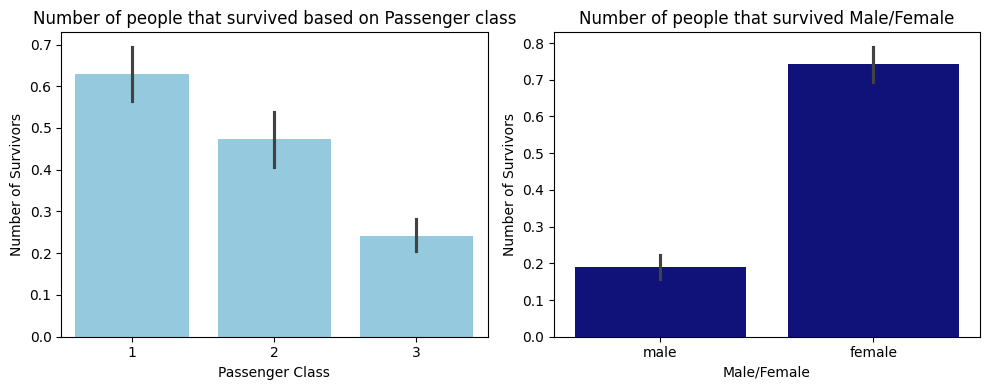

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(
    x='Pclass',
    y='Survived',
    data=train_df,
    color='skyblue')

plt.title('Number of people that survived based on Passenger class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Survivors')

plt.subplot(1,2,2)
sns.barplot(
    x='Sex',
    y='Survived',
    data=train_df,
    color='darkblue')

plt.title('Number of people that survived Male/Female')
plt.xlabel('Male/Female')
plt.ylabel('Number of Survivors')


plt.tight_layout()
plt.show()

In [3]:
from IPython.display import Markdown, display
average_fare = train_df['Fare'].mean()
average_age = round(train_df['Age'].mean())
display(Markdown(f"# Average Fare\n\nThe average fare is **${average_fare:.2f}**."))
display(Markdown(f"# Average Age\n\nThe average age of the passenger was **{average_age}**."))

# Average Fare

The average fare is **$32.20**.

# Average Age

The average age of the passenger was **30**.

Looking at the different types of fields int, float and Object and then also to look out for any nulls in the data to clear up

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train_df['Cabin'].value_counts()
#Too many nulls in the 'Cabin' column to be of any use in the training data.

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [8]:
## Drop the columns that will not be of any use in the training of our Machine Language model and then review the data
X = train_df.drop(['PassengerId','Ticket','Cabin'], axis=1)

In [9]:
X.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


We need to set up a column for 'Title' that just has the most common titles and then mark the other titles as 'others'

In [10]:
X['Title'] = X['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)
print(X['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


In [11]:
common_titles=['Mr', 'Mrs', 'Miss', 'Master']
X['Title'] = X['Title'].apply(lambda x: x if x in common_titles else 'Other')
    

In [12]:
X.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [13]:
X.isnull().sum()


Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

We have 177 nulls in the age column, so will fill these up with the average age based on Age/title group.

In [14]:
## Deal with missing ages with working out the median age based on Age/Title reported in the Dataset
median_ages = X.groupby('Title')['Age'].median()
median_ages

Title
Master     3.5
Miss      21.0
Mr        30.0
Mrs       35.0
Other     44.5
Name: Age, dtype: float64

In [15]:
def impute_age(row):
    if pd.isnull(row['Age']):
        return median_ages[row['Title']]
    else:
        return row['Age']

X['Age']= X.apply(impute_age, axis=1)

Now we can do a chart on the number of survivors amoungst the different age groups.

In [16]:
age_bins = [0,12,18,25,35,60,80]
age_labels = ['0-12','13-17','18-24','25-34','35-59','60-80']
train_df['AgedGroups'] = pd.cut(test_df['Age'], bins=age_bins, labels=age_labels, right=False)

train_df['AgedGroups'].value_counts()

AgedGroups
35-59    96
25-34    91
18-24    90
0-12     23
13-17    18
60-80    14
Name: count, dtype: int64

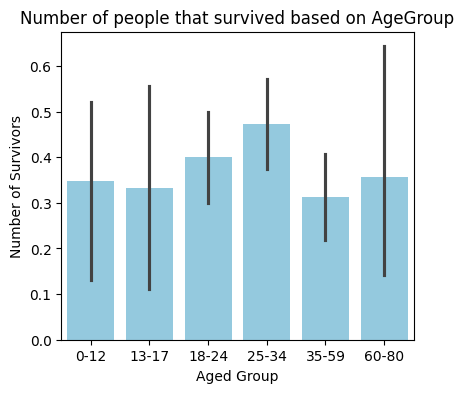

In [17]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(
    x='AgedGroups',
    y='Survived',
    data=train_df,
    color='skyblue')

plt.title('Number of people that survived based on AgeGroup')
plt.xlabel('Aged Group')
plt.ylabel('Number of Survivors')

plt.show()

In [18]:
X

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,Other
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.0,1,2,23.4500,S,Miss
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,Mr


In [19]:
## Proceed and drop the Two lines where the Embarked is showing NULL
X = X.dropna(subset=['Embarked'])

In [20]:
X.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [21]:
X

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,Other
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.0,1,2,23.4500,S,Miss
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,Mr


In [22]:
X = X.drop(['Name'], axis=1)


We are building the model on who is predicted to survive so we need to assign the 'Survived' column to the X variable when it comes to the training and testing part


In [23]:
y = X['Survived']
X = X.drop(['Survived'], axis=1)

In [24]:

      
## Now we need to deal with the Categorical columns: Label encoding for the 'Sex' column and One Hot Encoding for the 'Embarked' column

X['Sex'] = X['Sex'].map({'male':0, 'female':1})

In [25]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,22.0,1,0,7.2500,S,Mr
1,1,1,38.0,1,0,71.2833,C,Mrs
2,3,1,26.0,0,0,7.9250,S,Miss
3,1,1,35.0,1,0,53.1000,S,Mrs
4,3,0,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,S,Other
887,1,1,19.0,0,0,30.0000,S,Miss
888,3,1,21.0,1,2,23.4500,S,Miss
889,1,0,26.0,0,0,30.0000,C,Mr


In [26]:
X = pd.get_dummies(X, columns=['Embarked','Title'], drop_first=True)

In [27]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,3,0,22.0,1,0,7.2500,False,True,False,True,False,False
1,1,1,38.0,1,0,71.2833,False,False,False,False,True,False
2,3,1,26.0,0,0,7.9250,False,True,True,False,False,False
3,1,1,35.0,1,0,53.1000,False,True,False,False,True,False
4,3,0,35.0,0,0,8.0500,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,False,True,False,False,False,True
887,1,1,19.0,0,0,30.0000,False,True,True,False,False,False
888,3,1,21.0,1,2,23.4500,False,True,True,False,False,False
889,1,0,26.0,0,0,30.0000,False,False,False,True,False,False


Now we commence the build of the Machine learning model which we have selected [Support Vector Machine](https://scikit-learn.org/stable/modules/svm.html) to be the model type, we have set 70% to be the training data and 30% to be the test data, and a randomizer of 53 (random seed). Once the training has been completed we need to standardize the figures with a mean of 0 and std of 1 using the [StandardScaler](https://scikit-learn.org/stable/generated/sklearn.preprocessing.StandardScaler.html) sklearn function

In [28]:
## Now we apply StandardScaler() to the Pclass, Age,SibSp, Parch & Fare columns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into our training & testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=53)

numerical_features=['Pclass','Age','SibSp', 'Parch', 'Fare']

sc = StandardScaler()
 

X_train[numerical_features] = sc.fit_transform(X_train[numerical_features])
X_val[numerical_features] = sc.transform(X_val[numerical_features])


We need to check to see how accurate the training model is (model being a Support Vector Machine type), and running the GridSearchCV function from SKLearn we get a 83% accuracy score which is above the average of 60%

In [29]:
#Now start the training of the data via running Logistic Regression model and test for accuracy
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

#model = LogisticRegression(max_iter=1000, random_state=12)

param_grid = {
    'C': [0.1,1,10,100,1000],
    'kernel': ['Linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale','auto', 0.001, 0.01, 0.1, 1],
    'degree': [2,3,4],
}
    
svm_model = SVC(random_state=42)

grid_search = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Cross-validation Accuracy: {grid_search.best_score_:2f}')

best_svm_model = grid_search.best_estimator_

#Predict the class labels
y_pred = best_svm_model.predict(X_val)

#Now Predict the probabilities
#y_prob = best_svm_model.predict_pro(X_val)[:,1]

#Now evaluate the LogisticRegression Model
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy with best SVM: {accuracy:.2f}')

print(classification_report(y_val, y_pred))

#ROC AUC SCORE
#roc_auc = roc_auc_score(y_val, y_prob)
#print(f'ROC AUC SCORE: {roc_auc:.2f}')


Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best Parameters: {'C': 1, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}
Best Cross-validation Accuracy: 0.837613
Validation Accuracy with best SVM: 0.83
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       162
           1       0.81      0.73      0.77       105

    accuracy                           0.83       267
   macro avg       0.82      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



We now compare the performance with regards to accuracy with other learning types of Learning models:-

RandomForestClassifier
Decision Tree Classifier
XGB
MLPClassifier

In [30]:
#Compare the learning performance against other learning models
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Kneighbours Classifier': KNeighborsClassifier(n_neighbors=5),
    'XG Boost': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'Multi Neural Network': MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
}

for name, clf in models.items():
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print(f'{name} Accuracy: {scores.mean():.2f} (x/- {scores.std():.2f})')

Logistic Regression Accuracy: 0.82 (x/- 0.02)
Random Forest Accuracy: 0.80 (x/- 0.03)
SVM Accuracy: 0.83 (x/- 0.03)
Decision Tree Accuracy: 0.77 (x/- 0.04)
Kneighbours Classifier Accuracy: 0.71 (x/- 0.04)
XG Boost Accuracy: 0.81 (x/- 0.02)
Multi Neural Network Accuracy: 0.80 (x/- 0.02)


In [31]:
# #/
# # Which features in the learning dataset are the most influenctial in the learning process
# import numpy as np

# coefficients = best_svm_model.coef_[0]
# feature_names = X_train.columns

# feature_importance = pd.DataFrame({
#     'Feature': feature_names,
#     'coefficient': coefficients })

# feature_importance['AbsoluteCoefficient'] = np.abs(feature_importance['coefficient'])
# feature_importance['Sign'] = feature_importance['coefficient'].apply(lambda x: 'Positive' if x >=0 else 'Negative')
# feature_importance = feature_importance.sort_values(by='AbsoluteCoefficient', ascending=False)

# #Seaborne Bar Chart
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(10,6))

# sns.barplot(
#     x='AbsoluteCoefficient',
#     y='Feature',
#     data=feature_importance,
#     hue='Sign',   
#     dodge=False,
#     palette={'Positive': 'green', 'Negative': 'red'}
# )
# plt.title('Feature importance based on Coefficients (Logistic Regression)')
# plt.xlabel('Absolute value of Coefficient')
# plt.ylabel('Features')

# plt.tight_layout()
# plt.show()

# feature_importance
# \*


Now lets use the Python Seaborn library to view a bar chart to see which of the dimensions (columns of the data) contributed the most to the learning process of the Machine Library model.

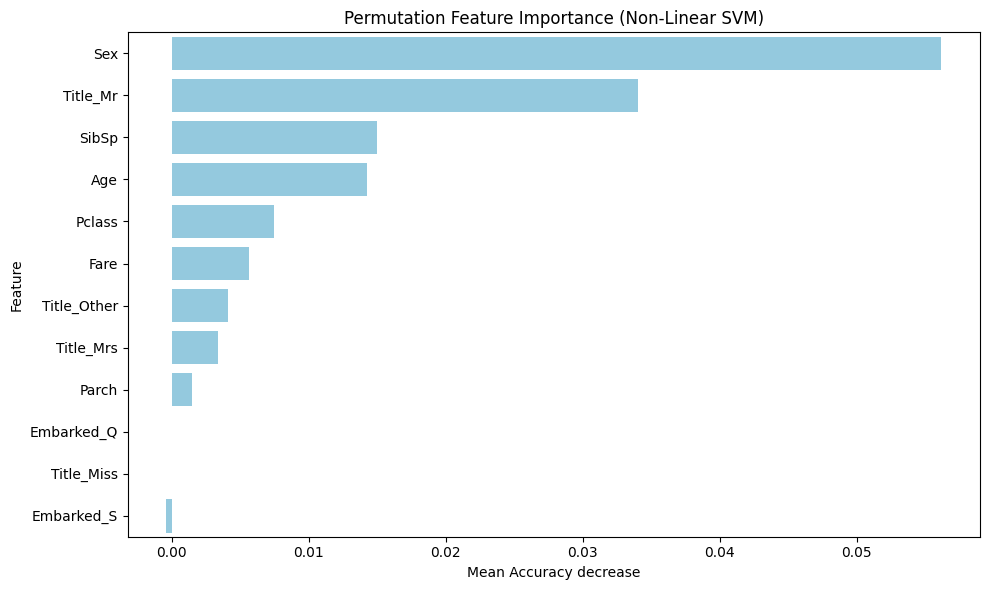

,Feature,Importance
1,Sex,0.056180
9,Title_Mr,0.034082
3,SibSp,0.014981
2,Age,0.014232
0,Pclass,0.007491
5,Fare,0.005618
11,Title_Other,0.004120
10,Title_Mrs,0.003371
4,Parch,0.001498
6,Embarked_Q,0.000000


In [32]:
from sklearn.inspection import permutation_importance


result = permutation_importance(best_svm_model, X_val, y_val, n_repeats=10, random_state=42, scoring='accuracy')

perm_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': result.importances_mean
})

perm_importance = perm_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=perm_importance,
    color='skyblue'
)

plt.title('Permutation Feature Importance (Non-Linear SVM)')
plt.xlabel('Mean Accuracy decrease')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

perm_importance

We see that it appears to be the 'Sex' column that has contributed the most in the build of the model followed by title

### Testing our newly built model on the set of test data that Kaggle has also provided for making the predictions on as to wether for each entry the model predicts that person would have survived (1) or not (0)

In [33]:
#Now lets run our developed model on the test dataset to make predictions as to who would have lived and those that will not live

test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


We have to go through the same data clean up on the test .csv data as we did on the above training data

In [34]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [35]:
test_df['Title'] = test_df['Name'].str.extract( r',\s*([^\.]+)\.', expand=False)
test_df['Title'].value_counts()
 


Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

1st part of the python code below is the data cleanup process, then the 2nd part we fit our model onto the test data (loaded into a pandas dataframe 'train_df') and the predictions are run against the test data. 

At the end of the script after the predictions have been made we then save this data into a new .csv file 'submissions.csv', we also need to append the  'Passenger_ID' column from the test data set as the submissions.csv file is then uploaded to the Kaggle competition web site with just the Passenger Id's and the list of predictions which is what is requested by Kaggle.

In [36]:
test_df['Title'] = test_df['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)
common_titles=['Mr', 'Mrs', 'Miss', 'Master']
test_df['Title'] = test_df['Title'].apply(lambda x: x if x in common_titles else 'Other')
test_df.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)

median_ages = test_df.groupby('Title')['Age'].median()
test_df['Age'].fillna(median_ages, inplace=True)

median_fare = test_df['Fare'].median()
test_df['Fare'].fillna(median_fare, inplace=True)
test_df['Age']= test_df.apply(impute_age, axis=1)

test_df['Sex'] = test_df['Sex'].map({'male':0, 'female':1})
test_df = pd.get_dummies(test_df, columns=['Embarked', 'Title'], drop_first=True)

#Re-arrange the columns in test_df to match with the training dataset
test_df = test_df.reindex(columns=X_train.columns, fill_value=0)

test_df[numerical_features] = sc.transform(test_df[numerical_features])

#Now the we finally make the predictions on the test data.

test_predictions = best_svm_model.predict(test_df)

passenger_ids = pd.read_csv('Data/test.csv')['PassengerId']

submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': test_predictions })

submission.to_csv('submission.csv', index=False)
test_df.isnull().sum()

Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_Q     0
Embarked_S     0
Title_Miss     0
Title_Mr       0
Title_Mrs      0
Title_Other    0
dtype: int64

In [37]:
predictions = pd.read_csv('submission.csv')

In [38]:
predictions

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


#### Below is the test table again but this time with the Predicted_Survivors column showing the passengers that if existed would have either survived (1) or not (0)

In [39]:
test_df1 = pd.read_csv('Data/test.csv')
test_df1['Predicted_Survivors'] = predictions['Survived']

In [40]:
test_df1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Predicted_Survivors
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


Below is the command to upload the data up to the Kaggle website.

In [41]:
!kaggle competitions submit -c titanic -f submission.csv -m "1st Titanic entry 25/09/2024 by A.Hirst"

100%|██████████████████████████████████████| 2.77k/2.77k [00:00<00:00, 7.19kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster

Below is a list of other competitions that Kaggle do:-

In [42]:
!kaggle datasets list

ref                                                              title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
lainguyn123/student-performance-factors                          Student Performance Factors                          94KB  2024-09-02 10:53:57          16510        319  1.0              
owm4096/laptop-prices                                            Laptop Prices                                        25KB  2024-09-09 12:43:01           4831         86  1.0              
abdulszz/spotify-most-streamed-songs                             Spotify Most Streamed Songs                          60KB  2024-09-07 18:23:14           3844         46  1.0              
delfinaoliva/movies                                    